In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits

mpl.rc('font', family='serif', size=16)

In [2]:
snia_list = '/Users/ryanrubenzahl/Documents/DESI/typeIa_spectra/grauer_SNIa/grauer_SNIa.txt'
weirdlist = '/Users/ryanrubenzahl/Documents/DESI/sdss_wierdest_galaxies.csv'

grauer_snia = pd.read_table(snia_list, header=None, sep=" ", 
                            names=["plate", "mjd", "fiber"])
weirdtable  = pd.read_csv(weirdlist)

In [3]:
snia_weirdness = {}
for i, row in grauer_snia.iterrows():
    plate, mjd, fiber = row
    key = "%04d-%d-%04d" % (plate, mjd, fiber)
    galaxy = weirdtable[(weirdtable['plate']==plate) 
               & (weirdtable['mjd']==mjd) 
               & (weirdtable['fiber']==fiber)]
    
    if not galaxy.empty:
        weirdness = galaxy['weirdness']
        snia_weirdness[key] = weirdness.values[0]

In [31]:
weirdlist = np.array(weirdtable['weirdness'])
snia_weirdlist = np.array(snia_weirdness.values())

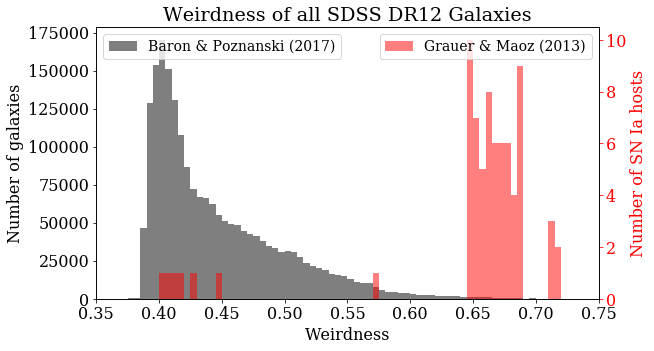

In [60]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

nbins = 200
ax.hist(weirdlist, color='k', bins=nbins, range=(0, 1),
        label='Baron & Poznanski (2017)', alpha=0.5)

ax2 = ax.twinx()
ax2.hist(snia_weirdness.values(), color='r', bins=nbins, range=(0, 1),
         label='Grauer & Maoz (2013)', alpha=0.5)

ax.set(xlabel='Weirdness', title='Weirdness of all SDSS DR12 Galaxies')
ax.set_ylabel(ylabel='Number of galaxies', color='k')
ax.tick_params('y', colors='k')

ax2.set_ylabel('Number of SN Ia hosts', color='r')
ax2.tick_params('y', colors='r')

ax.set(xlim=[0.35, .75])

ax.legend(loc='upper left', fontsize=14)
ax2.legend(loc='upper right', fontsize=14)
savedir = '/Users/ryanrubenzahl/Library/Ryan/College/Senior Thesis/'
savedir += 'thesis/Figures/'
# plt.savefig(savedir + 'weirdness_with_grauer_supernova.png', format='png',
#             dpi=300, bbox_inches='tight')

In [6]:
cut = 0.6

weird_snia = np.array(snia_weirdness.values())
tot_snia   = len(weird_snia)
num_weird_snia = len(weird_snia[weird_snia>cut])
percent = (100.*num_weird_snia / tot_snia)

print num_weird_snia, "/", tot_snia, "SN Ia (%.2f%%) over"%percent, cut

66 / 73 SN Ia (90.41%) over 0.6


In [7]:
weird_gals = np.array(weirdtable['weirdness'])
tot_gals   = len(weird_gals)
num_weird_gals = len(weird_gals[weird_gals>cut])
percent = (100.*num_weird_gals / tot_gals)

print num_weird_gals, "/", tot_gals, "galaxies (%.2f%%) over"%percent, cut

26707 / 2035688 galaxies (1.31%) over 0.6


In [8]:
# Plot all supernovae sorted by weirdness
sorted_snia = [snia for weirdness, snia in sorted(zip(snia_weirdness.values(),
                                  snia_weirdness.keys()))]

0604-52079-0209 0.400315849563
2886-54498-0598 0.40726530801
2594-54177-0348 0.412401871015
2954-54561-0572 0.415350483499
2949-54557-0440 0.427304632049
2499-54176-0550 0.446967985792
1788-54468-0126 0.574318164949
1189-52668-0239 0.645011472819
1957-53415-0232 0.646526519962
2376-53770-0183 0.647079268203
0745-52258-0092 0.647299012151
1758-53084-0523 0.647669125756
2218-53816-0295 0.648481892933
2664-54524-0468 0.648490244595
1697-53142-0506 0.648602395579
1205-52670-0632 0.648824726453
2771-54527-0005 0.649979465163
0438-51884-0166 0.650008585043
2165-53917-0406 0.650969853787
0498-51984-0102 0.651271417391
1645-53172-0349 0.652010055777
0328-52282-0570 0.652468155177
0578-52339-0314 0.652781977302
1700-53502-0302 0.653944370663
0271-51883-0171 not found
1843-53816-0491 0.655720422195
1278-52735-0425 0.657251246182
1400-53470-0234 0.657754950496
2747-54233-0613 0.659601450669
2768-54265-0233 0.660903518967
0291-51928-0076 0.661572394303
0358-51818-0181 0.661645109652
1710-53504-048

IOError: [Errno 2] No such file or directory: 'plots/weird_snia.pdf'

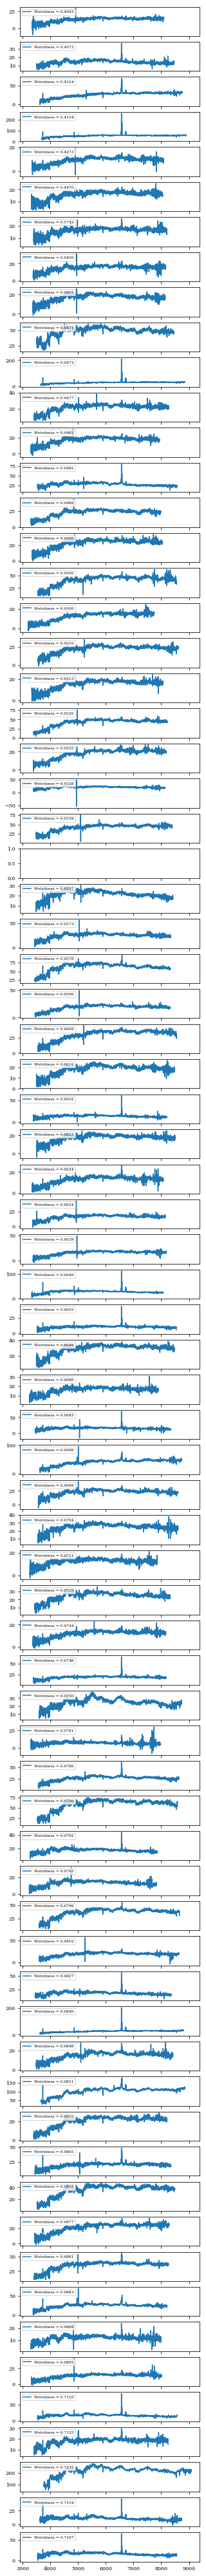

In [9]:
mpl.rc('font', family='serif', size=8)

fig, ax = plt.subplots(73,1,figsize=(5,73), sharex=True)
    
for i, key in enumerate(sorted_snia):
#     if snia_weirdness[key] > 0.6 and snia_weirdness[key] < 0.7:
#         continue
#     if i > 10:
#         break
        
    snia_file = '/Users/ryanrubenzahl/Documents/DESI/typeIa_spectra/grauer_SNIa/spec-%s.fits' % key

    try: 
        hdu = fits.open(snia_file)
    except IOError:
        print key, "not found"
        continue
    
    spec = hdu[1]
    wave = 10**spec.data['loglam'] #np.linspace(lamda1, lamda2, npix)
    flux = np.array(spec.data['flux'])
    z = hdu[2].data['Z'][0]
    
    wave /= (z + 1)
        
    ax[i].plot(wave, flux, label='Weirdness = %0.4f' % snia_weirdness[key])
    ax[i].legend(loc='upper left', fontsize=6)
    
    print key, snia_weirdness[key]
    
plt.savefig('plots/weird_snia.pdf', format='pdf', dpi=300, bbox_inches='tight')